# Langkah 1: Mengimpor Pustaka yang Dibutuhkan

In [13]:
# Mengimpor pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


Pada langkah ini, kita mengimpor pustaka yang diperlukan untuk analisis data dan pemodelan:

pandas: Digunakan untuk manipulasi dan analisis data.

numpy: Digunakan untuk operasi numerik dan manipulasi array.

seaborn dan matplotlib: Digunakan untuk visualisasi data.

sklearn.model_selection: Untuk membagi data menjadi data latih dan data uji, serta melakukan grid search untuk hyperparameter tuning.

sklearn.linear_model: Untuk regresi linear.

sklearn.ensemble: Untuk model Random Forest.

sklearn.metrics: Untuk menghitung metrik evaluasi seperti RMSE dan R²

#Langkah 2: Memuat Dataset

In [17]:
# Memuat dataset
file_path = '/content/Life Expectancy Data.csv'  # Sesuaikan path jika file diupload di folder lain
df = pd.read_csv(file_path)

# Menghapus spasi ekstra di sekitar nama kolom
df.columns = df.columns.str.strip()

# Menampilkan nama kolom untuk memverifikasi perubahan
print(df.columns)

# Menampilkan beberapa baris pertama untuk memahami struktur data
df.head()


Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Penjelasan:

Memuat Dataset: Dataset yang telah diunggah dibaca menggunakan pandas.read_csv(). File dataset harus ditempatkan di path yang sesuai.

Membersihkan Nama Kolom: Dengan menggunakan df.columns.str.strip(), kita menghapus spasi ekstra yang mungkin ada di sekitar nama kolom, sehingga tidak ada masalah saat merujuk ke nama kolom.

Memeriksa Nama Kolom: print(df.columns) digunakan untuk memverifikasi bahwa nama kolom sudah benar setelah pembersihan.

Menampilkan Beberapa Baris Data: df.head() digunakan untuk melihat beberapa baris pertama dataset agar bisa memahami struktur dan isi data.

# Langkah 3: Pembersihan Data dan Eksplorasi Data

Penjelasan:

Pembersihan Data:

df.dropna() digunakan untuk menghapus baris dengan nilai kosong (missing values). Ini memastikan bahwa data yang digunakan tidak terpengaruh oleh data yang hilang.

df.select_dtypes(include=[np.number]) memastikan hanya kolom numerik yang digunakan, karena Linear Regression dan Random Forest hanya menerima data numerik.

Eksplorasi Data:

Korelasi Antar Fitur: df_clean.corr() menghasilkan matriks korelasi antara fitur-fitur numerik, yang kemudian divisualisasikan menggunakan heatmap. Ini membantu kita melihat hubungan antar fitur dan mengidentifikasi fitur mana yang memiliki korelasi tinggi dengan target Life Expectancy.

Distribusi Life Expectancy: Dengan histogram dan KDE (Kernel Density Estimation), kita memvisualisasikan distribusi Life Expectancy untuk memahami sebarannya dalam dataset.

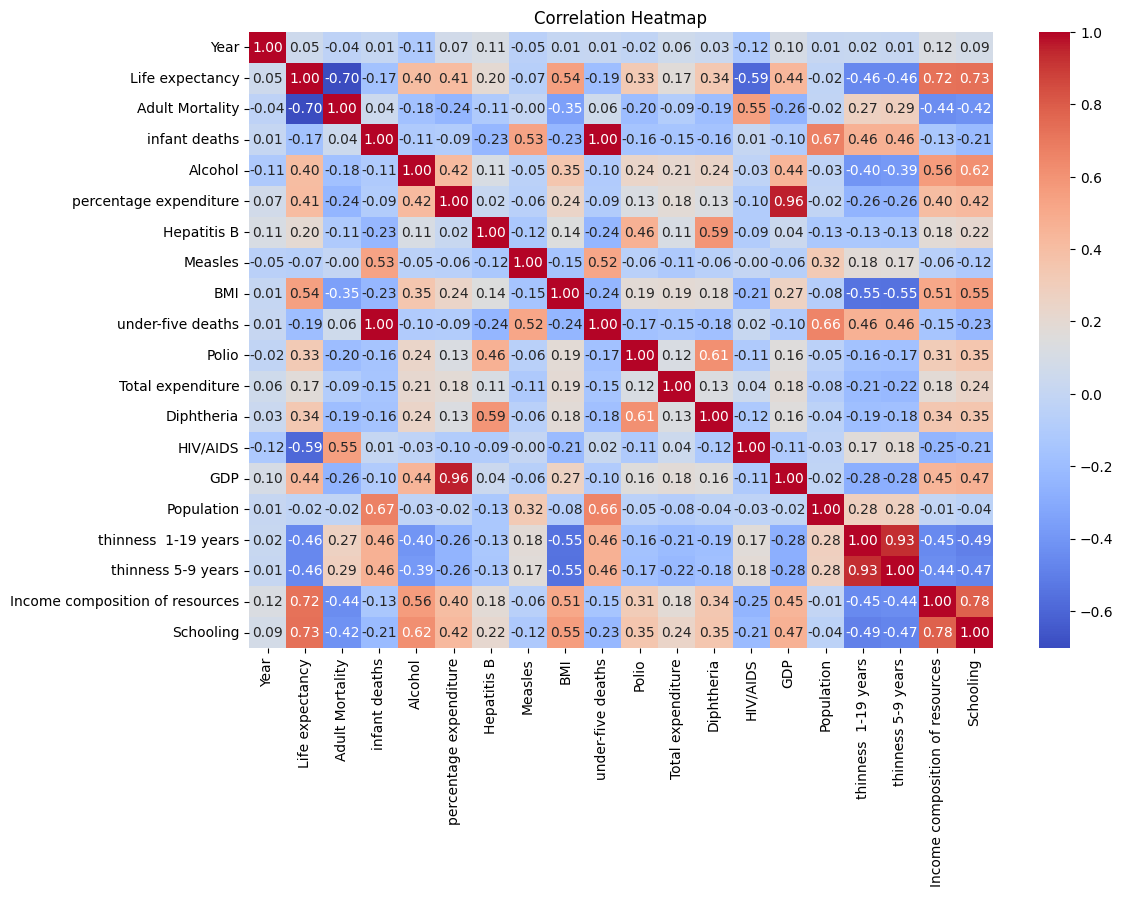

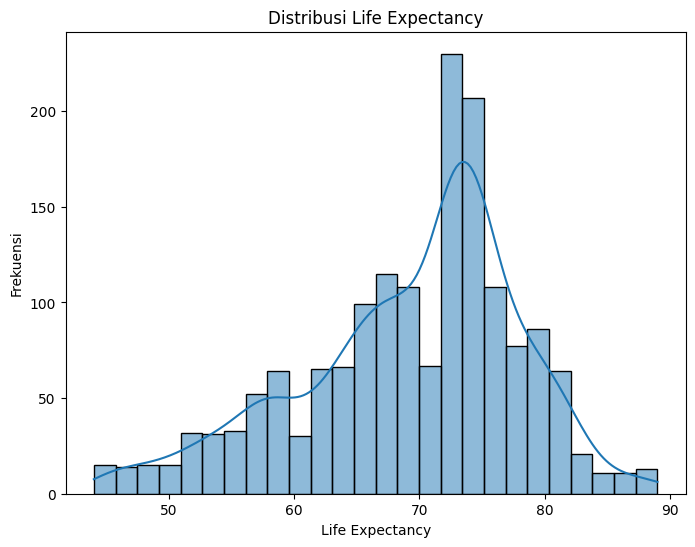

In [18]:
# Menyaring data yang relevan dan menangani nilai yang hilang
df_clean = df.dropna()  # Menghapus baris yang memiliki nilai kosong
df_clean = df_clean.select_dtypes(include=[np.number])  # Memilih hanya kolom numerik

# Memeriksa korelasi antar fitur
correlation_matrix = df_clean.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Visualisasi distribusi fitur Life expectancy
life_expectancy_col = 'Life expectancy'  # Nama kolom yang sudah dibersihkan
plt.figure(figsize=(8, 6))
sns.histplot(df_clean[life_expectancy_col], kde=True)
plt.title('Distribusi Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frekuensi')
plt.show()


# Langkah 4: Memisahkan Fitur dan Target

Penjelasan:

Memisahkan Fitur dan Target:

X = df_clean.drop(life_expectancy_col, axis=1) memisahkan fitur (variabel input) dari target (variabel yang ingin diprediksi).

y = df_clean[life_expectancy_col] memilih Life Expectancy sebagai variabel target.

Membagi Data:

train_test_split(X, y, test_size=0.2, random_state=42) membagi data menjadi dua bagian: 80% untuk pelatihan (training) dan 20% untuk pengujian (testing). Ini memastikan bahwa model diuji dengan data yang tidak digunakan saat pelatihan.

In [19]:
# Memisahkan fitur dan target (Life expectancy)
X = df_clean.drop(life_expectancy_col, axis=1)  # Fitur (semua kolom kecuali target)
y = df_clean[life_expectancy_col]  # Target (Life expectancy)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Langkah 5: Membuat Model Linear Regression

Penjelasan:

Membangun Model Linear Regression:

LinearRegression() digunakan untuk membuat model regresi linear.

lr_model.fit(X_train, y_train) melatih model menggunakan data pelatihan.

y_pred_lr = lr_model.predict(X_test) menghasilkan prediksi dari model menggunakan data uji.

Evaluasi Model:

RMSE dihitung dengan mean_squared_error dan kemudian diambil akar kuadratnya untuk mendapatkan nilai rata-rata kesalahan prediksi.

R² dihitung dengan r2_score untuk mengetahui sejauh mana model dapat menjelaskan variasi dalam data.



In [20]:
# 1. Model Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Menghitung evaluasi untuk regresi linear
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression R^2: {r2_lr:.2f}")


Linear Regression RMSE: 3.62
Linear Regression R^2: 0.82


# Langkah 6: Membuat Model Random Forest Regressor dengan Hyperparameter Tuning

Penjelasan:

Membangun Model Random Forest:

RandomForestRegressor() digunakan untuk membuat model Random Forest.

Hyperparameter Tuning dengan GridSearchCV:

GridSearchCV digunakan untuk mencari kombinasi terbaik dari hyperparameter (misalnya, jumlah pohon (n_estimators), kedalaman pohon (max_depth), dll.) dengan cross-validation.

grid_search.best_params_ menunjukkan parameter terbaik yang ditemukan oleh GridSearchCV.

Evaluasi Model:

RMSE dan R² dihitung untuk model Random Forest dan dibandingkan dengan hasil Linear Regression.



In [21]:
# 2. Model Random Forest Regressor dengan Hyperparameter Tuning
rf_model = RandomForestRegressor(random_state=42)

# Definisikan grid search untuk hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Jumlah pohon
    'max_depth': [10, 20, None],  # Kedalaman pohon
    'min_samples_split': [2, 5, 10],  # Minimum sampel untuk pembagian node
    'min_samples_leaf': [1, 2, 4]  # Minimum sampel untuk daun
}

# Menerapkan grid search dengan cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik dari grid search
print(f"Best parameters: {grid_search.best_params_}")

# Menggunakan model terbaik dari grid search untuk prediksi
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Menghitung evaluasi untuk random forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R^2: {r2_rf:.2f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest RMSE: 1.89
Random Forest R^2: 0.95


# Langkah 7: Visualisasi Hasil Prediksi

Penjelasan:

Visualisasi Hasil: Membandingkan prediksi Linear Regression dan Random Forest dengan nilai aktual menggunakan scatter plot.

Garis merah menunjukkan garis referensi yang menggambarkan prediksi yang sempurna (nilai prediksi sama dengan nilai aktual).

Ini memungkinkan kita untuk melihat seberapa baik kedua model dalam memprediksi Life Expectancy.

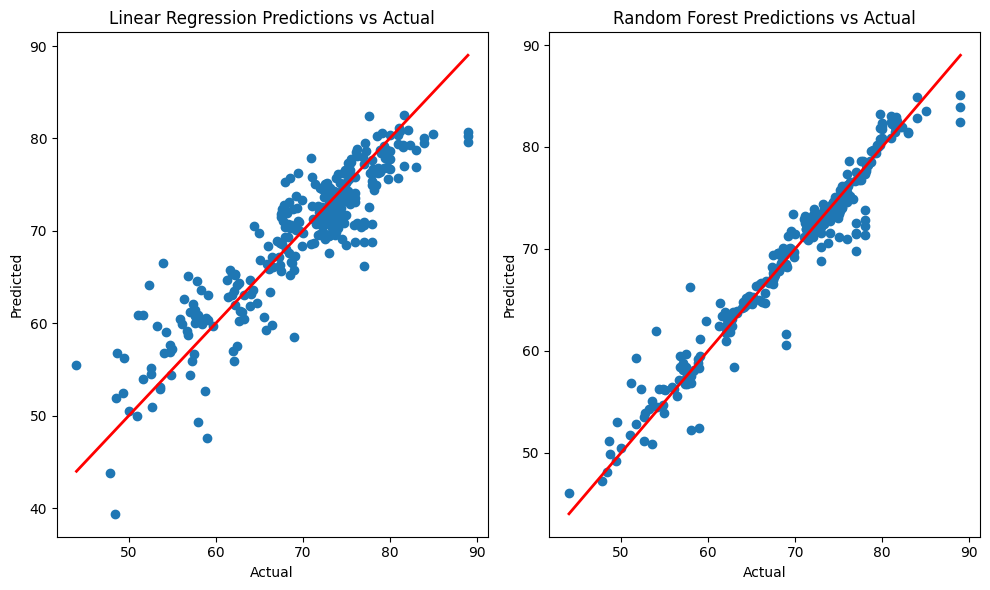

In [22]:
# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))

# Plot hasil Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Linear Regression Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot hasil Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Random Forest Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


# Kesimpulan Akhir Proyek:
Dalam proyek ini, kami bertujuan untuk membangun model machine learning yang dapat memprediksi Life expectancy berdasarkan fitur-fitur lain seperti GDP, alcohol consumption, measles, dan faktor-faktor lainnya. Kami menggunakan dua model berbeda untuk mencapai tujuan ini, yaitu Linear Regression dan Random Forest. Berikut adalah hasil dan analisis berdasarkan evaluasi model yang telah dilakukan:

### 1. Evaluasi Model Linear Regression
RMSE (Root Mean Squared Error): 3.62 — Ini menunjukkan bahwa model Linear Regression memiliki rata-rata kesalahan prediksi sekitar 3.62 tahun dari nilai Life expectancy yang sebenarnya.

R² (Koefisien Determinasi): 0.82 — Model ini dapat menjelaskan 82% variasi dalam Life expectancy. Meskipun model ini cukup baik, ada 18% variasi yang tidak dapat dijelaskan oleh model ini.

Grafik Linear Regression menunjukkan bahwa meskipun ada korelasi positif antara prediksi dan nilai aktual, model ini tidak terlalu akurat untuk nilai Life expectancy yang lebih tinggi, dengan distribusi yang lebih tersebar.

#### 2. Evaluasi Model Random Forest
RMSE (Root Mean Squared Error): 1.89 — Model Random Forest memberikan kesalahan prediksi yang lebih rendah, yaitu 1.89 tahun, yang jauh lebih akurat dibandingkan dengan Linear Regression.

R² (Koefisien Determinasi): 0.95 — Model ini dapat menjelaskan 95% variasi dalam Life expectancy, yang menunjukkan bahwa Random Forest jauh lebih efektif dalam menangkap hubungan kompleks antara fitur-fitur yang ada.

Grafik Random Forest menunjukkan distribusi prediksi yang sangat dekat dengan nilai aktual, menunjukkan bahwa model ini lebih mampu menangkap pola yang kompleks dalam data.

### 3. Analisis Hasil
Random Forest unggul dalam hal akurasi prediksi dengan RMSE yang lebih rendah dan R² yang lebih tinggi dibandingkan Linear Regression. Ini menunjukkan bahwa Random Forest lebih mampu menangkap hubungan non-linear dan kompleks dalam data.

Linear Regression, meskipun lebih sederhana dan lebih cepat untuk dilatih, terbukti kurang efektif dalam memodelkan variasi yang lebih kompleks dalam data Life expectancy.


Dengan hasil ini, proyek ini menunjukkan bahwa model berbasis ensemble seperti Random Forest lebih cocok untuk tugas prediksi yang kompleks dibandingkan dengan model linier seperti Linear Regression.

